# Homework 1 Practicum (35 Points)
### Version 1.0 (September 13, 2021)



**Instructions:**
This notebook is intended to guide you through creating and exploring your dataset. Please answer all questions in this notebook (you will see <font color='blue'>TODO</font> annotations for where to include your answers). At the beginning of each part, we will bullet the expected deliverables for you to complete. All questions can be answered in 1-4 sentences, unless otherwise noted.

Please <font color='blue'>make a copy of this notebook in your own drive</font> before you make any edits. You can do so through File -> Save a copy in Drive

## Part 1: Defining the Problem and Choosing a Dataset 
Things to do in this part:
1. Answer questions 1-5
2. Identify data sources to use in your dataset
3. List data sources used in question 5

Your first task is to choose a problem you're interested in. You are free to choose from any domain, but it should be within the **supervised learning** paradigm. In other words, a supervised classifier should be able to generalize from a training sample of $(X,y)$ pairs to predict outcomes on unseen data $x$. We want to use machine learning, so your problem should be difficult to solve using traditional programming algorithms. 

For simplicity, you will construct data for a binary or multiclass classification problem, where the possible labels are given by a fixed set of choices, or for a regression task (real-valued labels). Do not build a dataset for a structured prediction task.


#### 1) In one or two sentences, what are you interested in predicting given what data? This is your supervised learning problem. 

You should answer this question before creating your dataset, as it will provide an indication of what to search for.


<font color='blue'>
    We hope to understand if there are any standard team statistics (points, rebounds, field goal %, etc.) that may help dictate whether an NBA team wins a basketball game.
</font>



#### 2) Is this a well-defined problem? Why or why not? What ambiguities (if any) exist in your problem? 

Think about what challenges you solved by formulating the problem in this way.

<font color='blue'>
    This is a well defined problem. The dataset is complete, and there are no ambiguities about who won/lost a game.
</font>



#### 3) Does an easy (non-ML) solution exist for the problem? What are existing ways this problem, or a similar problem, is addressed (regardless of difficulty)? 

<font color='blue'>
    Aggregate parameters have been established to help gauge the efficiency/performance of a team beyond the base line statistics reported on a score sheet. This level of analysis is performed on a single player level, and even from play-by-play analysis of an individual game.
</font>



#### 4) Why is using machine learning for this problem justified? 

<font color='blue'>
    There are many potential parameters that may contribute positively or negatively towards improving team wins. In this datset, there are already 35 different features considered. Applying machine learning helps to understand the weight of each parameter of team success, which may guide team formation in the future.
</font>



Now, we'll turn to data we can use to actually solve your problem. You may wish to use Section 3.1 of the assignment sheet for inspiration. **Remember, you are expected to *create* a dataset, not use an existing one**.

#### 5) List the source of data you used (if more than one) when creating your dataset along with (very briefly) what you obtained from it.

For example: <br /> Obtained features a,b,c from http://www.domain1.com/example_data. <br /> Obtained labels from http://www.domain2.com/example_labels.


<font color='blue'>
    Obtained all features, labels from https://www.kaggle.com/ionaskel/nba-games-stats-from-2014-to-2018
</font>



## Part 2: What does the data look like?
Things to do in this part:
1. Answer questions 6-11
2. Print a few examples of raw data (if possible) otherwise explain what the raw data looks like.
3. Create at least 3 numerical features from your raw data
4. Create dataset such that $X\in\mathbb{R}^{m\times n}$ and $y\in\mathbb{R}^m$ are both numpy arrays
5. Create 1 visual that helps you understand your data.

Let's take a look at the various data you've collected. First let's read in the raw data. You may read the data into whatever is most convenient (e.g. a list, a numpy array, a Pandas dataframe, etc.). **At this point your data will be in whatever format you downloaded them in**. For example, if you're working with text data, your data might be strings of words or collection of text documents. If you are working with image data, you might have a collection of images.
<br /><br />
For those of you new to working with data in Python, we have included examples of how to import the raw data. These are merely suggestions if they work for you. You don't have to use them.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # Suppose you have a directory called documents that contains Wikipedia articles, you can process these as follows:
# # Cleaning the data (e.g. removing stop words) is not required.
# import os
# from collections import defaultdict

# files = [f for f in os.listdir('documents') if os.path.isfile(os.path.join('documents', f))
# X = defaultdict(list)
# for i, file in enumerate(files[:len(files)], start=1):
#     with open(os.path.join('documents', file)) as f:
#         X['doc_' + str(i)] = f.readlines()
# # X is a dictionary that maps doc_id to text.

# # Suppose you have labels that are stored in a CSV file:
# import pandas as pd

# y = pd.read_csv('labels.csv')
# # y is a Pandas dataframe that contains each label.

# # Suppose you have a directory called images that contains pictures of cats, you can process them as follows:
# from PIL import Image

# images = [f for f in os.listdir('images') if os.path.isfile(os.path.join('images', f))
# X = [Image.open(image) for image in images]
# # X is a list of PIL Image objects

#######################################################
# TODO: Read in your raw data

import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS675/nba.games.stats.csv')


X = data.drop(['WINorLOSS'],axis=1,inplace=False)
y = data.loc[:,'WINorLOSS']

#######################################################
data.head(), y.head()

(   Unnamed: 0 Team  Game  ... Opp.Blocks Opp.Turnovers Opp.TotalFouls
 0           1  ATL     1  ...          9             9             22
 1           2  ATL     2  ...          5            18             26
 2           3  ATL     3  ...          9            19             15
 3           4  ATL     4  ...          7            19             30
 4           5  ATL     5  ...          6            15             29
 
 [5 rows x 41 columns], 0    L
 1    W
 2    L
 3    L
 4    W
 Name: WINorLOSS, dtype: object)

Now, let's print a few examples. Depending on your data format, you may have to write this yourself. We have provided some examples below. 

In [ ]:
# # If your data is stored in an array:
# print('X:', X[:5])
# print('y:', y[:5])

# # If your data consists of image files:
# from PIL import Image

# for i in range(5):
#     print('image:')
#     img = X[i]
#     img.show()
#     print('label:', y[i])

#######################################################
# TODO: print out what a few examples of your raw data.

print('X: ', X[:5])
print('y: ', y[:5])

#######################################################

X:     Unnamed: 0 Team  Game  ... Opp.Blocks Opp.Turnovers Opp.TotalFouls
0           1  ATL     1  ...          9             9             22
1           2  ATL     2  ...          5            18             26
2           3  ATL     3  ...          9            19             15
3           4  ATL     4  ...          7            19             30
4           5  ATL     5  ...          6            15             29

[5 rows x 40 columns]
y:  0    L
1    W
2    L
3    L
4    W
Name: WINorLOSS, dtype: object


#### (Optional) If your raw data format can't be displayed in a Jupyter notebook (e.g. video or audio files), you may skip the above step. You should still look at the raw data in whatever way possibly, but instead just describe what the raw data is that you look at.

<font color='blue'>
    TODO: replace this cell with your answer. Leave blank if not applicable.
</font>

#### 6) What information is contained in each example (row) in $X$? These are your raw data features.

<font color='blue'>
    There is a glut of team statistics available from each game. This includes: 'Team', 'Game', 'Date', 'Home', 'Opponent', 'WINorLOSS',
       'TeamPoints', 'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted',
       'FieldGoals.', 'X3PointShots', 'X3PointShotsAttempted', 'X3PointShots.',
       'FreeThrows', 'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds',
       'TotalRebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'TotalFouls', 'Opp.FieldGoals', 'Opp.FieldGoalsAttempted',
       'Opp.FieldGoals.', 'Opp.3PointShots', 'Opp.3PointShotsAttempted',
       'Opp.3PointShots.', 'Opp.FreeThrows', 'Opp.FreeThrowsAttempted',
       'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds',
       'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers',
       'Opp.TotalFouls'
</font>



If your data is not numerical, this will be difficult for an algorithm to learn directly. So, now that you've seen what the raw data looks like, if you have non-numerical features, you would need to extract *numerical* features from the raw data.
<br /><br />
We can obtain numeric features through a process called **feature engineering**. Features may be derived from the existing raw data or may come from other data sources that can be associated with each example. This is a challenging task that often requires domain knowledge about the problem you are trying to solve. 
<br /><br />
While very important in dataset creation, feature engineering is not the focus of this assignment. You can choose to exclude the non-numeric features from your dataset or you can try feature engineering or you may choose work with a simpler dataset. One example of feature engineering is provided below. 
<br /><br />

In [ ]:
# # If you're using text data stored in a dictionary (like example above):
# # Suppose each document is a string that contains a period
# # and are trying to predict end of sentences (EOS),
# import re
# import pandas as pd
# from collections import defaultdict

# # Convert X from doc_id -> text to doc_id -> {sentence, features}
# X = {k:{'sentence': v, 'features': None} for k,v in X.items()}

# # suppose you downloaded these external data: common abbreviations, titles (e.g. mr, ms, dr), month abbreviations (e.g. sept, oct)
# abbrevs = pd.read_csv('common_abbrevs.csv')
# titles = pd.read_csv('titles.csv')
# months = pd.read_csv('month_abbrevs.csv')

# # for the purpose of this example, assume all documents have len > 3
# features = defaultdict(int)
# for doc_id, doc in X.items():
#     idx = re.find('.')
#     one_before = doc['sentence'][idx - 1] if idx > 0 else None
#     one_after = doc['sentence'][idx + 1] if idx < len(doc['sentence']) - 1 else None
#     features['is_abbrev'] = 1 if one_before and one_before in abbrevs else 0
#     features['is_title'] = 1 if one_before and one_before in titles else 0
#     features['is_month'] = 1 if one_before and one_before in months else 0
#     features['is_decimal'] = 1 if one_before and one_after in one_before.isdigit() and one_after.isdigit() else 0
#     features['other_punc'] = 1 if any((p in '?!.') for c in doc['sentence'][idx:]) else 0
#     features['period_loc'] = idx
#     X[doc_id]['features'] = features
# # In just a few lines of Python, we created 6 features!

HomeAway = {"Home":1, 'Away':0}
X['Home'].replace(HomeAway,inplace=True)

WinLoss = {'L': 0, 'W': 1}
y.replace(WinLoss, inplace=True)

PercRename = {'FieldGoals.':'FieldGoalsPerc','X3PointShots.':'X3PointShotsPerc','FreeThrows.':'FreeThrowsPerc',
              'Opp.FieldGoals.':'Opp.FieldGoalsPerc','Opp.X3PointShots.':'Opp.X3PointShotsPerc','Opp.FreeThrows.':
              'Opp.FreeThrowsPerc'}
X.rename(columns=PercRename,inplace=True)
pd.concat([X, y], axis=1).head()

,Unnamed: 0,Team,Game,Date,Home,Opponent,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoalsPerc,X3PointShots,X3PointShotsAttempted,X3PointShotsPerc,FreeThrows,FreeThrowsAttempted,FreeThrowsPerc,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoals,Opp.FieldGoalsAttempted,Opp.FieldGoalsPerc,Opp.3PointShots,Opp.3PointShotsAttempted,Opp.3PointShots.,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrowsPerc,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,WINorLOSS
0,1,ATL,1,2014-10-29,0,TOR,102,109,40,80,0.500,13,22,0.591,9,17,0.529,10,42,26,6,8,17,24,37,90,0.411,8,26,0.308,27,33,0.818,16,48,26,13,9,9,22,0
1,2,ATL,2,2014-11-01,1,IND,102,92,35,69,0.507,7,20,0.350,25,33,0.758,3,37,26,10,6,12,20,31,81,0.383,12,32,0.375,18,21,0.857,11,44,25,5,5,18,26,1
2,3,ATL,3,2014-11-05,0,SAS,92,94,38,92,0.413,8,25,0.320,8,11,0.727,10,37,26,14,5,13,25,31,69,0.449,5,17,0.294,27,38,0.711,11,50,25,7,9,19,15,0
3,4,ATL,4,2014-11-07,0,CHO,119,122,43,93,0.462,13,33,0.394,20,26,0.769,7,38,28,8,3,19,33,48,97,0.495,6,21,0.286,20,27,0.741,11,51,31,6,7,19,30,0
4,5,ATL,5,2014-11-08,1,NYK,103,96,33,81,0.407,9,22,0.409,28,36,0.778,12,41,18,10,5,8,17,40,84,0.476,8,21,0.381,8,11,0.727,13,44,26,2,6,15,29,1


Next, let's focus on what you're trying to predict. First, let's see what the potential outcomes look like. 

In [ ]:
import numpy as np

np.unique(y)

array([0, 1])

#### 7) Is your dataset suitable for a regression or classification task? Explain.

<font color='blue'>
    This dataset is suitable for a classification. There are only two potential options for an outcome of the game for a team. Either the listed team wins or loses the game.
</font>



Now, we'll standardize our data as follows. The data matrix $X$ should be a numpy 2d array in $\mathbb{R}^{m\times n}$. The labels should be a numpy 1d array in $\mathbb{R}^m$. $m$ is the number of examples and $n$ is the number of features. **You will be training your supervised classifer on the features, which may not include all (or any) of the raw data**. This is a decision you will make when creating your dataset.
<br /><br />
Note: this is the format we're looking for your data to be in when you submit your dataset (i.e. $X\in\mathbb{R}^{m\times n}$ and $y\in\mathbb{R}^m$ and are both numpy arrays).

In [ ]:
# # Now, using your numerical features from the previous step, you can construct the dataset.
# # Depending on what your raw data was (i.e. if any field was numerical), you may include this in the final dataset
# # or you may just use the features you created. 

# # Using the dictionary from above (doc_id -> {sentence, features}) the dataset can be constructed
# import numpy as np

# X = np.array([np.array(doc.features.values()) for doc in X.values()])
# y = np.array(y) # assume y was a list of binary labels previously

#######################################################
# TODO: Convert X and y to numpy arrays with appropriate dimensions
import numpy as np
x_edit = X.drop(['Unnamed: 0','Team','Game','Date','Opponent'],axis=1,inplace=False)
x_col = x_edit.columns
X = np.array(x_edit)
y = np.array(y)
#######################################################

If you have a classification dataset, let's look at class balance. This tells us how many examples we have for each label.

In [ ]:
for i in np.unique(y):
    print(f'{len(y[y==i])} examples of class {i}')

4920 examples of class 0
4920 examples of class 1


#### 8) Classification: Is your dataset balanced or imbalanced?


Regression: How are your labels distributed? Normal distrbution? Uniform within a range? etc. 

<font color='blue'>
    The labels are distributed perfectly evenly. This makes sense because for a given game, there is always one winner and one loser.
</font>



Let's compute some statistics for the dataset.

In [ ]:
#######################################################
print(f'Number of examples: {X.shape[0]}')
print(f'Number of features per example: {X.shape[1]}')
# there are many more that are relevant to the specific domain your data is in.
# TODO: if applicable, please include any additional dataset statistics here
#######################################################

Number of examples: 9840
Number of features per example: 35


#### 9) Do you have lot's of high quality data? Explain any limitations (if any) that exist in terms of data quantity and quality.

<font color='blue'>
    There is a lot of high quality data in this dataset. Each game is accounted for in this dataset and each statistic is well documented, so there are no holes in quality/quantity. Each team also plays an even number of games.
</font>



Data visualizations help us understand our data and draw insights. Just like there is no single ML algorithm that applies to every problem, there isn't a visualization that works for every dataset.
<br /> <br />
Instead, you will produce some visuals that you think tell an interesting story about your data. We will provide some suggestions, which you can use for inspiration. 
<br /> <br />

Types of information you may wish to capture (this is by no means comprehensive):
*   Missingness of data (consider using heat maps, scatter plots)
*   Correlation of features (consider using a correlation matrix)
*   Distribution of data (consider using historgrams, violin plots)
*   Linear separability, if you have binary classification
<br /> <br />

Check out these visualization galleries for further inspiration and example code:
*   [Seaborn](https://seaborn.pydata.org/examples/index.html)
*   [Plotly](https://plotly.com/python/)
*   [Python Graph Gallery](https://python-graph-gallery.com/)

You should create **at least 1 visualization** for your dataset and explain what you learned about your data from it. Below is an example heatmap showing correlation of features from the sklearn iris dataset.

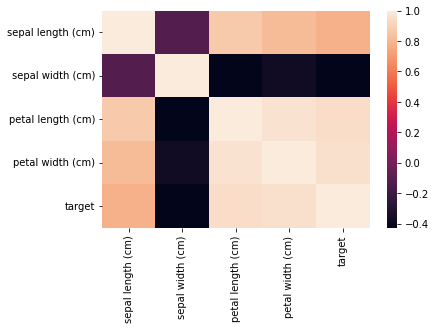

In [ ]:
from sklearn import datasets
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
sns.heatmap(df.corr(), 
            xticklabels=df.corr().columns.values,
            yticklabels=df.corr().columns.values)
plt.show()

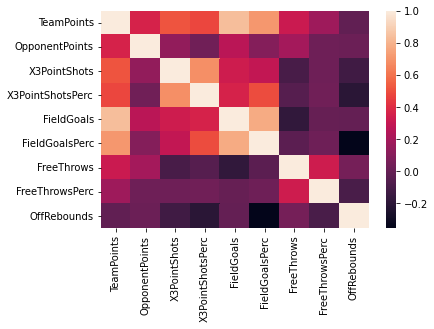

In [ ]:
#######################################################
# TODO: Visualize the dataset
import seaborn as sns
import matplotlib.pyplot as plt


feat = x_edit.loc[:,['TeamPoints','OpponentPoints','X3PointShots','X3PointShotsPerc',
                     'FieldGoals','FieldGoalsPerc','FreeThrows','FreeThrowsPerc','OffRebounds']]
sns.heatmap(feat.corr(),xticklabels=feat.corr().columns.values,yticklabels=feat.corr().columns.values)


#######################################################

#### 10) What insights do you gain from this visualization about your dataset?

<font color='blue'>
    As expected, the total number and percentage of shots and 3 point shots relates to the total number of points scored. However, the number of points scored by the opponent does not seem like a strong motivating factor for scoring more points. Similarly, free throw counts and percentages doesn't seem to be closely correlated to team points scored. Also, offensive rebounds, which indicates a team getting a rebound off of their own shot (potentially for another shot), has little bearing on team points.
</font>



#### 11) In your dataset, what discussions would you have about the ethical implications of what you were collecting? Are there any potential issues with fairness? 

<font color='blue'>
    There aren't any severe ethical implications of collecting and analyzing data from basketball games. Potentially, any executive decisions made by team managers about player status may affect player job opportunities. Additionally, there may be different considerations with specific teams that are not acknowledged in the data that may positively or negatively affect the collected data from that team.
</font>



## Part 3: Using your dataset

Things to do in this part:
1. Perform a train-validation-test split
2. Train a simple supervised learning algorithm on dataset
3. Hyper-parameter Tuning
4. Evaluation
5. Discussion

Now that you have created your dataset and explored some of its properties, you will use a supervised classifier to predict the outcome you definined in the problem statement. To evaluate how well this classifier predicts the outcomes, you will need to set some data aside for testing. First, you'll use sklearn to split the data into train and test sets, with 25% of the data reserved for testing.

In [ ]:
from sklearn.model_selection import train_test_split 

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(f'Training examples: {X_train.shape[0]}\nTesting examples :{X_test.shape[0]}')

#######################################################
# TODO: Split the training data into training and validation splits. 
# You can use approximately 20% of the training data as our validation data set.
 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print(f"Training examples: {X_train.shape[0]}\nValidation examples: {X_validation.shape[0]}")
#######################################################

Training examples: 7380
Testing examples :2460
Training examples: 5904
Validation examples: 1476


Now, we'll save your train and test sets. Together, these four files will make up the dataset you submit on Gradescope. 

In [ ]:
import numpy as np 
np.savetxt("X_train.csv", X_train, delimiter=",")
np.savetxt("X_validation.csv", X_validation, delimiter=",")
np.savetxt("X_test.csv", X_test, delimiter=",")
np.savetxt("y_train.csv", y_train, delimiter=",")
np.savetxt("y_validation.csv", y_validation, delimiter=",")
np.savetxt("y_test.csv", y_test, delimiter=",")

# zip together all components of your dataset
!zip homework1_dataset.zip X_train.csv X_test.csv y_train.csv y_test.csv

  adding: X_train.csv (deflated 92%)
  adding: X_test.csv (deflated 92%)
  adding: y_train.csv (deflated 99%)
  adding: y_test.csv (deflated 99%)


### Classifier Training

Now, let's train a Decision Tree classifier. You can train a decision tree for both regression or classification problem.  You are encouraged to use any popular packages such as sklearn. Here is the link to the scikit-learn site: https://scikit-learn.org/stable/modules/tree.html

[0 1]


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

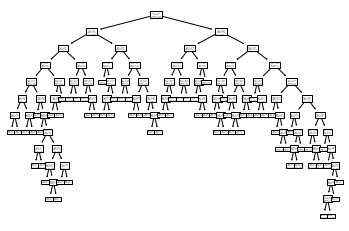

In [ ]:
#######################################################
# TODO: Train a decision tree on your dataset
from sklearn import tree
default_model = tree.DecisionTreeClassifier(random_state=0)
default_model.fit(X_train, y_train)

tree.plot_tree(default_model)
print(np.unique(y_train))

default_model.get_params()
#######################################################

### Hyperparameter Tuning

Background on hyperparameters:
Most any ML method has 'hyper' or 'run' parameters that the user can tune/adjust, modifying how the algorithm functions. The process of tweaking and optimizing these parameters to improve ML performance is known as [hyperparameter optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization). A hyperparameter sweep mostly commonly includes identifying which algorithm parameters are known to, or are likely to, impact performance on a given dataset, and then varying the setting of these one or more paramters in separate runs of the algorithm.  This step is not only important for squeezing the maximum performance out of ML methods, but also in fairly compairing the performance of different ML methods on given datasets.  

Out of necessity, almost all ML algorithms have default hyperparameters specified (related to [default arguments](https://en.wikipedia.org/wiki/Default_argument). First and foremost, default parameters are specified so that the algorithm is able to run even if the user forgets to specify these hyperparamters. They are often set with the intention of testing out the method on a 'toy' or demonstration dataset included with the software, or they are set as simple, accessible placeholders to ensure that the first time a user runs the software it runs smoothly and quickly. However, default parameters are certainly not guarenteed (if even likely) to lead to optimal ML performance on a given dataset. 

The most common and basic hyperparameter sweep strategies include a [grid search](https://medium.com/datadriveninvestor/an-introduction-to-grid-search-ff57adcc0998) or a [random search](https://en.wikipedia.org/wiki/Random_search), but other more sophisticated searches are also employed. 

Like with many other things in ML, there is no absolute right way to perform a hyperparameter sweep. One could easily waste a large amount of computational time on an exhaustive serach of hyperparameter settings and combinations without improving performance much, or at all. However, some degree of hyperparameter searching outside of using the default hyperparameter settings is considered essential to ML best practices. 


Now, let's train another classifier and tune its parameters to give it better performance. You are encouraged to try out a different algorithm than the one you used before and can use popular packages such as sklearn. We have provided some sample code on how grid search and random search can be used to tune parameters for Decision Trees below.

#### You are required to perform a grid search of at least two hyper-parameters of your model. Make sure that you have a way to identify the best hyperparameters for a given dataset and feature extraction method

#### Decision Tree - Random Sweep of Major Hyperparameters
Here you should consider some of the hyperparameters with the most potential to impact decision tree performance. 

* max_depth = The maximum depth of the tree. (default = None)
* min_samples_split = The minimum number of samples required to split an internal node: (default = 2)
* min_samples_leaf  = The minimum number of samples required to be at a leaf node. (default = 1)
* criterion = The function to measure the quality of a split. (Default = 'gini')

In [ ]:
# Prepare a range/set of hyperparameter values for each
#param_grid = {"max_depth": [3, None], "min_samples_split": randint(2, 10), "min_samples_leaf": randint(1, 10), "criterion": ["gini", "entropy"]}

#model = tree.DecisionTreeClassifier(random_state=randSeed)
#Specifics of the random sweep - up to 100 randomly selected hyperparameter combinations
#hp_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, random_state=randSeed)
#hp_search.fit(x_validation, y_validation)

#######################################################
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# TODO: Perform a hyperparameter search using your validation data on a classifier (the classifier can be the same structure as the one your have above)
param_grid = {"max_depth": list(range(3, 11)) + [None], "min_samples_split": list(range(2,8)), "min_samples_leaf": list(range(1,10)), "criterion": ["gini", "entropy"]}

model = tree.DecisionTreeClassifier(random_state=0)
# grid search of parameters
hp_search = GridSearchCV(estimator=model, param_grid=param_grid)
hp_search.fit(X_train, y_train)

print("Best parameters:", hp_search.best_params_)
#######################################################


Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 6}


### Evaluation


Proper evaluation is critical to making good conclusions. Many metrics and measures of model 'goodness' exist. Part of what differentiates these evaluation methods is understanding the assumptions being made by a given metric, or what the metric prioritizes as important for model goodness. A nice review of key evaluation metrics can be found [here](http://www.davidsbatista.net/blog/2018/08/19/NLP_Metrics/). 

Below we will apply some different evaluation methods to the model that was trained using the 'optimal' parameter settings identified in the random sweep or grid search. All evaluations will focus on predictive performance on the testing data. 

The metrics are typically based on calculations using the different possible classification predictions that can be made: True Positives (TP), True Negative (TN), False Positive (FP), and False Negative (FN).  See [here](https://towardsdatascience.com/the-mystery-of-true-positive-true-negative-false-positive-and-false-negative-fd73c78c905a) to review TP, TN, FP, FN.


In [ ]:
# Sample code for calculating TP, TN, FP and FN for a decision tree
#Calculate confusion matrix (true outcomes, predicted outcomes)
#TN, FP, FN, TP = confusion_matrix(y_test, dt_test_pred).ravel()

#print("TP = "+str(TP))
#print("FP = "+str(FP))
#print("FN = "+str(FN))
#print("TN = "+str(TN))

#######################################################
# TODO: Compute TP, TN, FP, FN of the simple classifer you trained and the classifier that you tuned
from sklearn.metrics import confusion_matrix


y_test_pred_default = default_model.predict(X_test)
y_test_pred_tuned   = hp_search.predict(X_test)

print(np.unique(y_test_pred_default), np.unique(y_test_pred_tuned))

TN_d, FP_d, FN_d, TP_d = confusion_matrix(y_test, y_test_pred_default).ravel()
TN_t, FP_t, FN_t, TP_t = confusion_matrix(y_test, y_test_pred_tuned).ravel()

print("Default parameters:")
for k, v in zip(['TN', 'FP', 'FN', 'TP'], [TN_d, FP_d, FN_d, TP_d]):
  print(f"{k} = {v}")

# for
print(" | ".join(map(str, [TP_d, TN_d, FP_d, FN_d])))
print()

print("Tuned parameters:")
for k, v in zip(['TN', 'FP', 'FN', 'TP'], [TN_t, FP_t, FN_t, TP_t]):
  print(f"{k} = {v}")

# for
print(" | ".join(map(str, [TP_t, TN_t, FP_t, FN_t])))




#######################################################

[0 1] [0 1]
Default parameters:
TN = 1193
FP = 9
FN = 8
TP = 1250
1250 | 1193 | 9 | 8

Tuned parameters:
TN = 1195
FP = 7
FN = 12
TP = 1246
1246 | 1195 | 7 | 12


| Model       | True Positive |True Negative| False Positive| False Negative
| :---        |    :----:   |            ---: |           ---: |          ---: |
| Model 1     |       1250 | 1193 | 9 | 8  |                |                       
| Model 2     |       1246      |       1195        | 7  | 12             |                |                


These values (TP, FP, FN, TN) are components used to calculate a number of different evaluation metrics for classification tasks:

* Accuracy = (TP + TN)/(TP + TN + FP + FN)
* Precision (a.k.a. Sensitivity)= TP/(TP + FP)
* Recall (a.k.a. True Positive Rate) = TP/(TP + FN)
* Specificity = TN/(TN + FP)
* False Positive Rate = FP/(FP + TN)

* F1 Score = 2*(Precision * Recall)/(Precision + Recall)
* Balanced Accuracy = (Sensitivity + Specificity)/2



In [ ]:
#######################################################
# TODO: Compute the accuracy, precision, recall etc. of the simple classifer you trained and the classifier that you tuned

# default model
acc_d = (TP_d + TN_d)/(TP_d + TN_d + FP_d + FN_d) # accuracy
prc_d = TP_d/(TP_d + FP_d) # precision or sensitivity
rec_d = TP_d/(TP_d + FN_d) # recall or true prositive rate
spc_d = TN_d/(TN_d + FP_d) # specificitiy
fpr_d = FP_d/(FP_d + TN_d) # false positive rate
f1s_d = 2*prc_d*rec_d/(prc_d + rec_d) # F1 score
bac_d = (prc_d + spc_d)/2 # balanced accuracy

# tuned model
acc_t = (TP_t + TN_t)/(TP_t + TN_t + FP_t + FN_t) # accuracy
prc_t = TP_t/(TP_t + FP_t) # precision or sensitivity
rec_t = TP_t/(TP_t + FN_t) # recall or true prositive rate
spc_t = TN_t/(TN_t + FP_t) # specificitiy
fpr_t = FP_t/(FP_t + TN_t) # false positive rate
f1s_t = 2*prc_t*rec_t/(prc_t + rec_t) # F1 score
bac_t = (prc_t + spc_t)/2 # balanced accuracy

score_names = ["Accuracy", "Sensitivity", "Recall", "Specificity",
               "False Positive Rate", "F1 Score", "Balance Accuracy"]
scores_d = [acc_d, prc_d, rec_d, spc_d, fpr_d, f1s_d, bac_d]
scores_t = [acc_t, prc_t, rec_t, spc_t, fpr_t, f1s_t, bac_t]

max_strlen = max(map(len, score_names))

print("Default parameters:")
for name, score in zip(score_names, scores_d):
  print(f"{name:{max_strlen+1}s}: {score:.4f}")

# for
print(" | ".join(map(lambda x: str(np.round(x, 4)), scores_d)))
print()

print("Tuned parameters:")
for name, score in zip(score_names, scores_t):
  print(f"{name:{max_strlen+1}s}: {score:.4f}")

# for
print(" | ".join(map(lambda x: str(np.round(x, 4)), scores_t)))

#######################################################

Default parameters:
Accuracy            : 0.9931
Sensitivity         : 0.9929
Recall              : 0.9936
Specificity         : 0.9925
False Positive Rate : 0.0075
F1 Score            : 0.9932
Balance Accuracy    : 0.9927
0.9931 | 0.9929 | 0.9936 | 0.9925 | 0.0075 | 0.9932 | 0.9927

Tuned parameters:
Accuracy            : 0.9923
Sensitivity         : 0.9944
Recall              : 0.9905
Specificity         : 0.9942
False Positive Rate : 0.0058
F1 Score            : 0.9924
Balance Accuracy    : 0.9943
0.9923 | 0.9944 | 0.9905 | 0.9942 | 0.0058 | 0.9924 | 0.9943


| Model       | Accuracy |Precision| Recall| Specificity | False Positive Rate | F1 Score | Balanced Accuracy
| :---        |    :----:   |            ---: |           ---: |          ---: | :---        | :---        | :---        |
| Model 1     | 0.9931 | 0.9929 | 0.9936 | 0.9925 | 0.0075 | 0.9932 | 0.9927
| Model 2     | 0.9923 | 0.9944 | 0.9905 | 0.9942 | 0.0058 | 0.9924 | 0.9943


### ROC Curve and AUC metric 
The ROC curve is a metric used for the evaluation of binary classification models, where we evaluate how the model would perform if different cutoff thresholds (of predicted class probability) between the two classes were considered. This is useful when we don't necessarily know which class is more important to predict accurately. For example, if we wanted to evaluate how well a test for a highly infectious disease worked, we would care much more about identifying positive individuals correctly than negative individuals, even at the expense of additional false positives.

To calculate a ROC curve first we need to get the class prediction probabilites from the model, rather than just the predicted classes, since these predicted classes were decided based on a predetermined classification threshold.

ROC AUC
Default:  0.9930765893621918
Tuned:  0.992713852640935


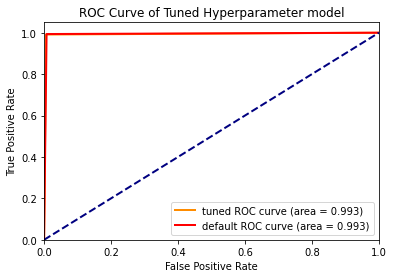

In [ ]:
# Sample code for you to calculate ROC
#Determine probabilities of class predictions for each test instance (this will be used much later in calculating an ROC curve)
#probas_ = dt.fit(x_train_fs, y_train).predict_proba(x_test_fs)

# Compute ROC curve and area the curve
#fpr, tpr, thresholds = metrics.roc_curve(y_test, probas_[:, 1])
#roc_auc = auc(fpr, tpr)

#Plot the ROC Curve and include AUC in figure. 
#plt.figure()
#lw = 2
#plt.plot(fpr, tpr, color='darkorange',
#         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
#plt.legend(loc="lower right")
#plt.show()

#######################################################
# TODO: Visualize the ROC and AUC for your models
from sklearn.metrics import roc_curve, auc
probas_t = hp_search.predict_proba(X_test)
probas_d = default_model.predict_proba(X_test)

fpr_t, tpr_t, thresholds = roc_curve(y_test, probas_t[:,1])
fpr_d, tpr_d, thresholds = roc_curve(y_test, probas_d[:,1])

roc_auc_t = auc(fpr_t, tpr_t)
roc_auc_d = auc(fpr_d, tpr_d)

print("ROC AUC")
print("Default: ", roc_auc_d)
print("Tuned: ", roc_auc_t)

plt.figure()
lw = 2
plt.plot(fpr_t, tpr_t, color='darkorange', lw=lw, label=f'tuned ROC curve (area = {roc_auc_t:.3f})')
plt.plot(fpr_d, tpr_d, color='red', lw=lw, label=f'default ROC curve (area = {roc_auc_d:.3f})')
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0,1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve of Tuned Hyperparameter model")
plt.legend(loc = 'lower right')
plt.show()

#######################################################

#### Discussion questions:

1.   Which classifer performed better? Why? 
    <br><br>
    <font color='blue'>
    They both appear to perform relatively well on this dataset. It could be because the dataset is easy to learn that most parameters with infinite depth can learn it. The default parameters had a slightly larger AUC for the ROC curve, however it's false positive rate was higher than that of the tuned. Furthermore the tuned model has a higher balanced accuracy than the default parameters.
</font>
<br><br>
2. What other methods could you do to increase the performance of your model on a held out test set?
<br><br>
    <font color='blue'>
    The models already perform, really well as is (as seen in the ROC curve). We could improve learning by increaing the number of parameters we search for in our grid search method.
</font>
<br><br>




## Feedback

Please provide us with some feedback on how long each section or this homework overall took you. Any other feedback is also welcomed. 

## Submit
Great work! You're all done.

Make sure to submit this Python notebook (as a PDF) and the dataset you created as a zip file. See the homework writeup for directions.